# Explorando mi Github
## Los hábitos de programación

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
import os
plt.style.use('ggplot')
%matplotlib inline

matplotlib.rcParams['font.family'] = 'Open Sans'
def set_title(fig, ax, title, subtitle, rect=[0, 0, 1, 0.9]):
    fig.tight_layout(rect=rect)
    ax.text(0, 1.06, title, va='bottom', transform=ax.transAxes, fontsize=20, fontweight='semibold')
    ax.text(0, 1.05, subtitle, fontsize=17, va='top', transform=ax.transAxes, fontweight='light')

Lo primero a notar, es que la información se bajó como JSON por cada repositorio, por lo tanto, hay que generar un gran dataset con toda la información comprimida (de ser posible)

In [2]:
!ls data/

ADSW		feelTheDesktop	       personalapps  StemReveal.js
AID		findfood	       PocketmonGO   topshows
apuntes-mat023	find-roots	       pong-python   traductor
blog		genetic_algorithm      projecteuler  vimwiki
ChatRedes	got		       ramos	     word-generator
cv		js_presentations       redes
dotfiles	markov-word-generator  SansanoBot
ElepemonGO	my-facebook-analysis   semaphore


Cada json del repositorio contiene solamente los commits, por lo tanto se creará un dataset que los contendrá todos juntos

In [3]:
files = os.listdir('data/')
files

['ADSW',
 'AID',
 'ChatRedes',
 'ElepemonGO',
 'PocketmonGO',
 'SansanoBot',
 'StemReveal.js',
 'apuntes-mat023',
 'blog',
 'cv',
 'dotfiles',
 'feelTheDesktop',
 'find-roots',
 'findfood',
 'genetic_algorithm',
 'got',
 'js_presentations',
 'markov-word-generator',
 'my-facebook-analysis',
 'personalapps',
 'pong-python',
 'projecteuler',
 'ramos',
 'redes',
 'semaphore',
 'topshows',
 'traductor',
 'vimwiki',
 'word-generator']

In [4]:
with open('data/' + files[0]) as f:
    text = f.read()
json.loads(text)[0].keys()

dict_keys(['sha', 'commit', 'url', 'html_url', 'comments_url', 'author', 'committer', 'parents'])

Las variables que nos podrían interesar son `author` y `commit`, para identificar los commits propios y la información en sí del commit.

In [5]:
print(json.loads(text)[0]['author'])
print(json.loads(text)[0]['commit'])

{'login': 'GasparCorrea', 'id': 13988262, 'avatar_url': 'https://avatars1.githubusercontent.com/u/13988262?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/GasparCorrea', 'html_url': 'https://github.com/GasparCorrea', 'followers_url': 'https://api.github.com/users/GasparCorrea/followers', 'following_url': 'https://api.github.com/users/GasparCorrea/following{/other_user}', 'gists_url': 'https://api.github.com/users/GasparCorrea/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/GasparCorrea/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/GasparCorrea/subscriptions', 'organizations_url': 'https://api.github.com/users/GasparCorrea/orgs', 'repos_url': 'https://api.github.com/users/GasparCorrea/repos', 'events_url': 'https://api.github.com/users/GasparCorrea/events{/privacy}', 'received_events_url': 'https://api.github.com/users/GasparCorrea/received_events', 'type': 'User', 'site_admin': False}
{'author': {'name': 'Gaspar Octavio', 'emai

Finalmente, con la ayuda de `author` se verificará si fui yo quien hizo commit, y con `commit` se sacará la fecha y el mensaje.

In [6]:
df_dict = {'repository':[], 'message':[], 'time':[]}
for f in files:
    repository = f
    with open("data/" + f) as f:
        text = f.read()
    for commit in json.loads(text):
        if not commit:
            continue
        
        if not 'author' in commit:
            continue
           
        email = commit['commit']['author']['email']
        if "sebastian.aedo" in email or "saedo" in email:
            df_dict['repository'].append(repository)
            df_dict['message'].append(commit['commit']['message'])
            df_dict['time'].append(commit['commit']['author']['date'])

In [7]:
df = pd.DataFrame(df_dict)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
message       258 non-null object
repository    258 non-null object
time          258 non-null object
dtypes: object(3)
memory usage: 6.1+ KB


,message,repository,time
0,cambiado a SVC,AID,2017-12-09T01:38:39Z
1,Merge branch 'master' of https://github.com/et...,AID,2017-12-09T00:04:30Z
2,"fixeado water, terminando clustering, falta ex...",AID,2017-12-09T00:04:06Z
3,avanzado tarea,AID,2017-12-08T22:07:47Z
4,avanzado clustering,AID,2017-12-08T19:35:27Z
5,avanzando en la hepatitis,AID,2017-12-08T17:21:33Z
6,Trabajando en la hepatitis,AID,2017-12-08T01:29:07Z
7,version py,AID,2017-11-10T13:02:31Z
8,updateada NN,AID,2017-11-10T12:43:58Z
9,ported to keras,AID,2017-11-09T23:22:13Z


Habiendo generado el dataset, ahora se parseará time

In [8]:
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))

In [9]:
df

,message,repository,time
0,cambiado a SVC,AID,2017-12-09 01:38:39
1,Merge branch 'master' of https://github.com/et...,AID,2017-12-09 00:04:30
2,"fixeado water, terminando clustering, falta ex...",AID,2017-12-09 00:04:06
3,avanzado tarea,AID,2017-12-08 22:07:47
4,avanzado clustering,AID,2017-12-08 19:35:27
5,avanzando en la hepatitis,AID,2017-12-08 17:21:33
6,Trabajando en la hepatitis,AID,2017-12-08 01:29:07
7,version py,AID,2017-11-10 13:02:31
8,updateada NN,AID,2017-11-10 12:43:58
9,ported to keras,AID,2017-11-09 23:22:13


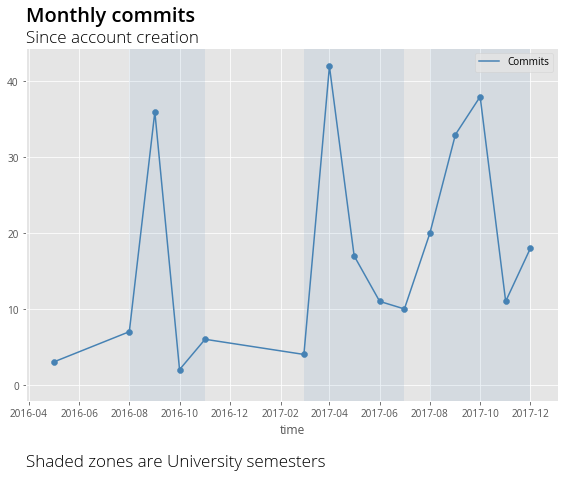

In [10]:
from datetime import date

fig, ax = plt.subplots(figsize=(8,7))
# se agrupa por mes
grouped = df.groupby(df['time'].apply(lambda x: date(year=x.year, month=x.month, day=1))).count()


grouped.plot(y='repository', ax=ax, label='Commits', color='steelblue')
ax.scatter(x=grouped.index, y=grouped['repository'], label='Commits', color='steelblue')

set_title(fig, ax, "Monthly commits", "Since account creation", [0, 0.1, 1, 0.92])
ax.text(0, -0.15, "Shaded zones are University semesters", fontsize=17, va='top', transform=ax.transAxes, fontweight='light')


import matplotlib.transforms as mtransforms

# truco para pintar por eje X
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

# 2016-2
ax.fill_between(grouped.index, 0, 40, where=((grouped.index > date(2016,7,19)) & (grouped.index < date(2016,11,20))), 
                facecolor='steelblue', alpha=0.1, transform=trans)
# 2017-1
ax.fill_between(grouped.index, 0, 40, where=((grouped.index >= date(2017,3,1)) & (grouped.index < date(2017,7,19))), 
                facecolor='steelblue', alpha=0.1, transform=trans)

# 2017-2
ax.fill_between(grouped.index, 0, 40, where=((grouped.index >= date(2017,8,1)) & (grouped.index < date(2017,12,20))), 
                facecolor='steelblue', alpha=0.1, transform=trans)


plt.savefig("img/monthly_commit.png", dpi=300)

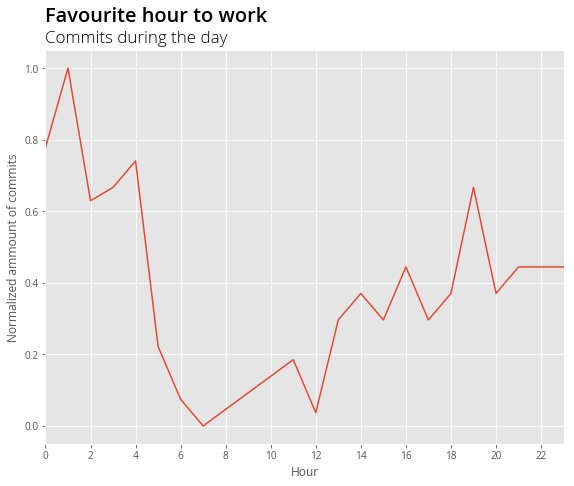

In [11]:
fig, ax = plt.subplots(figsize=(8,7))

grouped = df.groupby(df['time'].apply(lambda x: x.hour)).count()
grouped = (grouped - grouped.min())/(grouped.max() - grouped.min())
grouped.plot(y="message", ax=ax, legend=False)
set_title(fig, ax, "Favourite hour to work", "Commits during the day", [0.02, 0, 1, 0.9])
ax.set_xticks(range(0, 25, 2));
ax.set_xlabel("Hour")
ax.set_ylabel("Normalized ammount of commits")
ax.set_xlim(0, 23)
#ax.text(1, -0.1, "@EtraStyle", va='bottom', ha='right', alpha=0.5, transform=ax.transAxes)
fig.savefig("img/commit_hours.png", dpi=300)

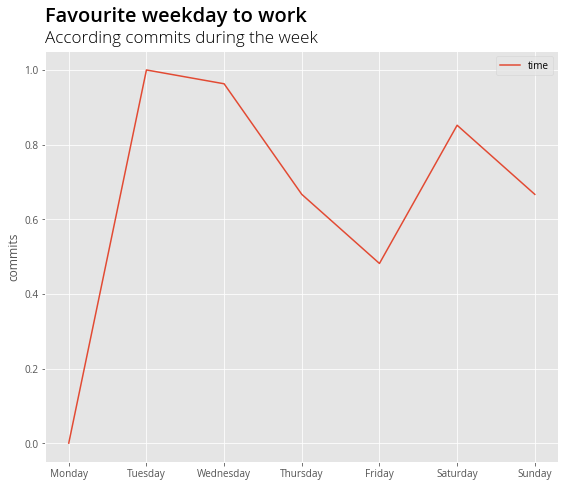

In [34]:
fig, ax = plt.subplots(figsize=(8,7))
# se agrupa por mes
temp = df.copy()
temp['weekday'] = temp['time'].apply(lambda x: x.strftime("%u"))

grouped = temp.groupby('weekday').count()
grouped = grouped.reset_index()
grouped['weekday'] = pd.to_numeric(grouped['weekday'])

grouped['time'] = (grouped['time'] - grouped['time'].min())/(grouped['time'].max() - grouped['time'].min())

grouped.plot(x='weekday', y='time', ax=ax)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xticks(range(1, 8, 1))
ax.set_xlabel("")
ax.set_ylabel("commits")
set_title(fig, ax, "Favourite weekday to work", "According commits during the week")

fig.savefig("img/commit_week.png", dpi=300)